In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import json
import tweepy
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
# download image prediction tsv file programatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [4]:
# save image prediction file in project folder
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

Assign Image Predictions file to a Dataframe:

In [5]:
df1 = pd.read_csv('image-predictions.tsv', sep='\s+')

In [6]:
df1.tweet_id.count()

2075

Import the twitter archive file:

In [7]:
df2 = pd.read_csv('twitter-archive-enhanced.csv')

In [8]:
df2.tweet_id.count()

2356

In [9]:
# authorize tweepy

consumer_key = 'hidden'
consumer_secret = 'hidden'
access_token = 'hidden'
access_secret = 'hidden'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [10]:
test_tweet = api.get_status(df2.tweet_id[1000], tweet_mode='extended')

In [11]:
test_tweet._json

{'created_at': 'Wed Jun 29 01:23:16 +0000 2016',
 'id': 747963614829678593,
 'id_str': '747963614829678593',
 'full_text': 'PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this pupper in your thoughts https://t.co/ZPfeRtOX0Q',
 'truncated': False,
 'display_text_range': [0, 70],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 747963600220917761,
    'id_str': '747963600220917761',
    'indices': [71, 94],
    'media_url': 'http://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg',
    'url': 'https://t.co/ZPfeRtOX0Q',
    'display_url': 'pic.twitter.com/ZPfeRtOX0Q',
    'expanded_url': 'https://twitter.com/dog_rates/status/747963614829678593/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 937, 'h': 632, 'resize': 'fit'},
     'small': {'w': 680, 'h': 459, 'resize': 'fit'},
     'large': {'w': 937, 'h': 632, '

In [12]:
data = {}
data['tweet'] = []
tweet_count = 1
tweet_errors = {}

for tweet_id in df2.tweet_id.values:
    try: 
        tweet = api.get_status(tweet_id, tweet_mode='extended') 
        print('Tweet Count: {}'.format(tweet_count))
        print('Tweet ID: {}'.format(tweet_id))
        
        # get info for retweet count, favorite count and followers count
        json_tweet = tweet._json
        retweet_count = json_tweet['retweet_count']
        favorite_count = json_tweet['favorite_count']
        followers_count = json_tweet['user']['followers_count']
        
        # append the infos to the data dict.
        data['tweet'].append({'tweet_id': tweet_id,
                              'retweet_count': retweet_count, 
                              'favorite_count': favorite_count, 
                              'followers_count': followers_count
                              })
        
        tweet_count += 1
         
        # catch errors in tweet errors dict.
    except Exception as e:
            print('An Error occured on ID: ' + str(tweet_id) + 'Error Message: ' + str(e))
            tweet_errors[str(tweet_id)] = json_tweet

Tweet Count: 1
Tweet ID: 892420643555336193
Tweet Count: 2
Tweet ID: 892177421306343426
Tweet Count: 3
Tweet ID: 891815181378084864
Tweet Count: 4
Tweet ID: 891689557279858688
Tweet Count: 5
Tweet ID: 891327558926688256
Tweet Count: 6
Tweet ID: 891087950875897856
Tweet Count: 7
Tweet ID: 890971913173991426
Tweet Count: 8
Tweet ID: 890729181411237888
Tweet Count: 9
Tweet ID: 890609185150312448
Tweet Count: 10
Tweet ID: 890240255349198849
Tweet Count: 11
Tweet ID: 890006608113172480
Tweet Count: 12
Tweet ID: 889880896479866881
Tweet Count: 13
Tweet ID: 889665388333682689
Tweet Count: 14
Tweet ID: 889638837579907072
Tweet Count: 15
Tweet ID: 889531135344209921
Tweet Count: 16
Tweet ID: 889278841981685760
Tweet Count: 17
Tweet ID: 888917238123831296
Tweet Count: 18
Tweet ID: 888804989199671297
Tweet Count: 19
Tweet ID: 888554962724278272
An Error occured on ID: 888202515573088257Error Message: [{'code': 144, 'message': 'No status found with that ID.'}]
Tweet Count: 20
Tweet ID: 88807843445

Tweet Count: 167
Tweet ID: 858843525470990336
Tweet Count: 168
Tweet ID: 858471635011153920
Tweet Count: 169
Tweet ID: 858107933456039936
Tweet Count: 170
Tweet ID: 857989990357356544
Tweet Count: 171
Tweet ID: 857746408056729600
Tweet Count: 172
Tweet ID: 857393404942143489
Tweet Count: 173
Tweet ID: 857263160327368704
Tweet Count: 174
Tweet ID: 857214891891077121
Tweet Count: 175
Tweet ID: 857062103051644929
Tweet Count: 176
Tweet ID: 857029823797047296
Tweet Count: 177
Tweet ID: 856602993587888130
Tweet Count: 178
Tweet ID: 856543823941562368
Tweet Count: 179
Tweet ID: 856526610513747968
Tweet Count: 180
Tweet ID: 856330835276025856
Tweet Count: 181
Tweet ID: 856288084350160898
Tweet Count: 182
Tweet ID: 856282028240666624
Tweet Count: 183
Tweet ID: 855862651834028034
Tweet Count: 184
Tweet ID: 855860136149123072
Tweet Count: 185
Tweet ID: 855857698524602368
Tweet Count: 186
Tweet ID: 855851453814013952
Tweet Count: 187
Tweet ID: 855818117272018944
Tweet Count: 188
Tweet ID: 8554594

Tweet Count: 338
Tweet ID: 831926988323639298
Tweet Count: 339
Tweet ID: 831911600680497154
Tweet Count: 340
Tweet ID: 831670449226514432
Tweet Count: 341
Tweet ID: 831650051525054464
Tweet Count: 342
Tweet ID: 831552930092285952
Tweet Count: 343
Tweet ID: 831322785565769729
Tweet Count: 344
Tweet ID: 831315979191906304
Tweet Count: 345
Tweet ID: 831309418084069378
Tweet Count: 346
Tweet ID: 831262627380748289
Tweet Count: 347
Tweet ID: 830956169170665475
Tweet Count: 348
Tweet ID: 830583320585068544
Tweet Count: 349
Tweet ID: 830173239259324417
Tweet Count: 350
Tweet ID: 830097400375152640
Tweet Count: 351
Tweet ID: 829878982036299777
Tweet Count: 352
Tweet ID: 829861396166877184
Tweet Count: 353
Tweet ID: 829501995190984704
Tweet Count: 354
Tweet ID: 829449946868879360
Tweet Count: 355
Tweet ID: 829374341691346946
Tweet Count: 356
Tweet ID: 829141528400556032
Tweet Count: 357
Tweet ID: 829011960981237760
Tweet Count: 358
Tweet ID: 828801551087042563
Tweet Count: 359
Tweet ID: 8287703

Tweet Count: 512
Tweet ID: 809808892968534016
Tweet Count: 513
Tweet ID: 809448704142938112
Tweet Count: 514
Tweet ID: 809220051211603969
Tweet Count: 515
Tweet ID: 809084759137812480
Tweet Count: 516
Tweet ID: 808838249661788160
Tweet Count: 517
Tweet ID: 808733504066486276
Tweet Count: 518
Tweet ID: 808501579447930884
Tweet Count: 519
Tweet ID: 808344865868283904
Tweet Count: 520
Tweet ID: 808134635716833280
Tweet Count: 521
Tweet ID: 808106460588765185
Tweet Count: 522
Tweet ID: 808001312164028416
Tweet Count: 523
Tweet ID: 807621403335917568
Tweet Count: 524
Tweet ID: 807106840509214720
Tweet Count: 525
Tweet ID: 807059379405148160
Tweet Count: 526
Tweet ID: 807010152071229440
Tweet Count: 527
Tweet ID: 806629075125202948
Tweet Count: 528
Tweet ID: 806620845233815552
Tweet Count: 529
Tweet ID: 806576416489959424
Tweet Count: 530
Tweet ID: 806542213899489280
Tweet Count: 531
Tweet ID: 806242860592926720
Tweet Count: 532
Tweet ID: 806219024703037440
Tweet Count: 533
Tweet ID: 8059589

Tweet Count: 688
Tweet ID: 786286427768250368
Tweet Count: 689
Tweet ID: 786233965241827333
Tweet Count: 690
Tweet ID: 786051337297522688
Tweet Count: 691
Tweet ID: 786036967502913536
Tweet Count: 692
Tweet ID: 785927819176054784
Tweet Count: 693
Tweet ID: 785872687017132033
Tweet Count: 694
Tweet ID: 785639753186217984
Tweet Count: 695
Tweet ID: 785533386513321988
Tweet Count: 696
Tweet ID: 785515384317313025
Tweet Count: 697
Tweet ID: 785264754247995392
Tweet Count: 698
Tweet ID: 785170936622350336
Tweet Count: 699
Tweet ID: 784826020293709826
Tweet Count: 700
Tweet ID: 784517518371221505
Tweet Count: 701
Tweet ID: 784431430411685888
Tweet Count: 702
Tweet ID: 784183165795655680
Tweet Count: 703
Tweet ID: 784057939640352768
Tweet Count: 704
Tweet ID: 783839966405230592
Tweet Count: 705
Tweet ID: 783821107061198850
Tweet Count: 706
Tweet ID: 783695101801398276
Tweet Count: 707
Tweet ID: 783466772167098368
Tweet Count: 708
Tweet ID: 783391753726550016
Tweet Count: 709
Tweet ID: 7833475

Tweet Count: 862
Tweet ID: 761227390836215808
Tweet Count: 863
Tweet ID: 761004547850530816
Tweet Count: 864
Tweet ID: 760893934457552897
Tweet Count: 865
Tweet ID: 760656994973933572
Tweet Count: 866
Tweet ID: 760641137271070720
Tweet Count: 867
Tweet ID: 760539183865880579
Tweet Count: 868
Tweet ID: 760521673607086080
Tweet Count: 869
Tweet ID: 760290219849637889
Tweet Count: 870
Tweet ID: 760252756032651264
Tweet Count: 871
Tweet ID: 760190180481531904
Tweet Count: 872
Tweet ID: 760153949710192640
Tweet Count: 873
Tweet ID: 759943073749200896
Tweet Count: 874
Tweet ID: 759923798737051648
Tweet Count: 875
Tweet ID: 759846353224826880
Tweet Count: 876
Tweet ID: 759793422261743616
Tweet Count: 877
Tweet ID: 759566828574212096
Tweet Count: 878
Tweet ID: 759557299618865152
Tweet Count: 879
Tweet ID: 759447681597108224
Tweet Count: 880
Tweet ID: 759446261539934208
Tweet Count: 881
Tweet ID: 759197388317847553
Tweet Count: 882
Tweet ID: 759159934323924993
Tweet Count: 883
Tweet ID: 7590995

Rate limit reached. Sleeping for: 553


An Error occured on ID: 758828659922702336Error Message: Failed to send request: ('Connection aborted.', OSError("(10054, 'WSAECONNRESET')",))
Tweet Count: 886
Tweet ID: 758740312047005698
Tweet Count: 887
Tweet ID: 758474966123810816
Tweet Count: 888
Tweet ID: 758467244762497024
Tweet Count: 889
Tweet ID: 758405701903519748
Tweet Count: 890
Tweet ID: 758355060040593408
Tweet Count: 891
Tweet ID: 758099635764359168
Tweet Count: 892
Tweet ID: 758041019896193024
Tweet Count: 893
Tweet ID: 757741869644341248
Tweet Count: 894
Tweet ID: 757729163776290825
Tweet Count: 895
Tweet ID: 757725642876129280
Tweet Count: 896
Tweet ID: 757611664640446465
Tweet Count: 897
Tweet ID: 757597904299253760
Tweet Count: 898
Tweet ID: 757596066325864448
Tweet Count: 899
Tweet ID: 757400162377592832
Tweet Count: 900
Tweet ID: 757393109802180609
Tweet Count: 901
Tweet ID: 757354760399941633
Tweet Count: 902
Tweet ID: 756998049151549440
Tweet Count: 903
Tweet ID: 756939218950160384
Tweet Count: 904
Tweet ID: 75

Tweet Count: 1058
Tweet ID: 739932936087216128
Tweet Count: 1059
Tweet ID: 739844404073074688
Tweet Count: 1060
Tweet ID: 739623569819336705
Tweet Count: 1061
Tweet ID: 739606147276148736
Tweet Count: 1062
Tweet ID: 739544079319588864
Tweet Count: 1063
Tweet ID: 739485634323156992
Tweet Count: 1064
Tweet ID: 739238157791694849
Tweet Count: 1065
Tweet ID: 738891149612572673
Tweet Count: 1066
Tweet ID: 738885046782832640
Tweet Count: 1067
Tweet ID: 738883359779196928
Tweet Count: 1068
Tweet ID: 738537504001953792
Tweet Count: 1069
Tweet ID: 738402415918125056
Tweet Count: 1070
Tweet ID: 738184450748633089
Tweet Count: 1071
Tweet ID: 738166403467907072
Tweet Count: 1072
Tweet ID: 738156290900254721
Tweet Count: 1073
Tweet ID: 737826014890496000
Tweet Count: 1074
Tweet ID: 737800304142471168
Tweet Count: 1075
Tweet ID: 737678689543020544
Tweet Count: 1076
Tweet ID: 737445876994609152
Tweet Count: 1077
Tweet ID: 737322739594330112
Tweet Count: 1078
Tweet ID: 737310737551491075
Tweet Count: 

Tweet Count: 1233
Tweet ID: 711363825979756544
Tweet Count: 1234
Tweet ID: 711306686208872448
Tweet Count: 1235
Tweet ID: 711008018775851008
Tweet Count: 1236
Tweet ID: 710997087345876993
Tweet Count: 1237
Tweet ID: 710844581445812225
Tweet Count: 1238
Tweet ID: 710833117892898816
Tweet Count: 1239
Tweet ID: 710658690886586372
Tweet Count: 1240
Tweet ID: 710609963652087808
Tweet Count: 1241
Tweet ID: 710588934686908417
Tweet Count: 1242
Tweet ID: 710296729921429505
Tweet Count: 1243
Tweet ID: 710283270106132480
Tweet Count: 1244
Tweet ID: 710272297844797440
Tweet Count: 1245
Tweet ID: 710269109699739648
Tweet Count: 1246
Tweet ID: 710153181850935296
Tweet Count: 1247
Tweet ID: 710140971284037632
Tweet Count: 1248
Tweet ID: 710117014656950272
Tweet Count: 1249
Tweet ID: 709918798883774466
Tweet Count: 1250
Tweet ID: 709901256215666688
Tweet Count: 1251
Tweet ID: 709852847387627521
Tweet Count: 1252
Tweet ID: 709566166965075968
Tweet Count: 1253
Tweet ID: 709556954897764353
Tweet Count: 

Tweet Count: 1408
Tweet ID: 697995514407682048
Tweet Count: 1409
Tweet ID: 697990423684476929
Tweet Count: 1410
Tweet ID: 697943111201378304
Tweet Count: 1411
Tweet ID: 697881462549430272
Tweet Count: 1412
Tweet ID: 697630435728322560
Tweet Count: 1413
Tweet ID: 697616773278015490
Tweet Count: 1414
Tweet ID: 697596423848730625
Tweet Count: 1415
Tweet ID: 697575480820686848
Tweet Count: 1416
Tweet ID: 697516214579523584
Tweet Count: 1417
Tweet ID: 697482927769255936
Tweet Count: 1418
Tweet ID: 697463031882764288
Tweet Count: 1419
Tweet ID: 697270446429966336
Tweet Count: 1420
Tweet ID: 697259378236399616
Tweet Count: 1421
Tweet ID: 697255105972801536
Tweet Count: 1422
Tweet ID: 697242256848379904
Tweet Count: 1423
Tweet ID: 696900204696625153
Tweet Count: 1424
Tweet ID: 696894894812565505
Tweet Count: 1425
Tweet ID: 696886256886657024
Tweet Count: 1426
Tweet ID: 696877980375769088
Tweet Count: 1427
Tweet ID: 696754882863349760
Tweet Count: 1428
Tweet ID: 696744641916489729
Tweet Count: 

Tweet Count: 1583
Tweet ID: 686035780142297088
Tweet Count: 1584
Tweet ID: 686034024800862208
Tweet Count: 1585
Tweet ID: 686007916130873345
Tweet Count: 1586
Tweet ID: 686003207160610816
Tweet Count: 1587
Tweet ID: 685973236358713344
Tweet Count: 1588
Tweet ID: 685943807276412928
Tweet Count: 1589
Tweet ID: 685906723014619143
Tweet Count: 1590
Tweet ID: 685681090388975616
Tweet Count: 1591
Tweet ID: 685667379192414208
Tweet Count: 1592
Tweet ID: 685663452032069632
Tweet Count: 1593
Tweet ID: 685641971164143616
Tweet Count: 1594
Tweet ID: 685547936038666240
Tweet Count: 1595
Tweet ID: 685532292383666176
Tweet Count: 1596
Tweet ID: 685325112850124800
Tweet Count: 1597
Tweet ID: 685321586178670592
Tweet Count: 1598
Tweet ID: 685315239903100929
Tweet Count: 1599
Tweet ID: 685307451701334016
Tweet Count: 1600
Tweet ID: 685268753634967552
Tweet Count: 1601
Tweet ID: 685198997565345792
Tweet Count: 1602
Tweet ID: 685169283572338688
Tweet Count: 1603
Tweet ID: 684969860808454144
Tweet Count: 

Tweet Count: 1753
Tweet ID: 678341075375947776
Tweet Count: 1754
Tweet ID: 678334497360859136
Tweet Count: 1755
Tweet ID: 678278586130948096
Tweet Count: 1756
Tweet ID: 678255464182861824
Tweet Count: 1757
Tweet ID: 678023323247357953
Tweet Count: 1758
Tweet ID: 678021115718029313
Tweet Count: 1759
Tweet ID: 677961670166224897
Tweet Count: 1760
Tweet ID: 677918531514703872
Tweet Count: 1761
Tweet ID: 677895101218201600
Tweet Count: 1762
Tweet ID: 677716515794329600
Tweet Count: 1763
Tweet ID: 677700003327029250
Tweet Count: 1764
Tweet ID: 677698403548192770
Tweet Count: 1765
Tweet ID: 677687604918272002
Tweet Count: 1766
Tweet ID: 677673981332312066
Tweet Count: 1767
Tweet ID: 677662372920729601
Tweet Count: 1768
Tweet ID: 677644091929329666
Tweet Count: 1769
Tweet ID: 677573743309385728
Tweet Count: 1770
Tweet ID: 677565715327688705
Tweet Count: 1771
Tweet ID: 677557565589463040
Tweet Count: 1772
Tweet ID: 677547928504967168
Tweet Count: 1773
Tweet ID: 677530072887205888
Tweet Count: 

Rate limit reached. Sleeping for: 509


An Error occured on ID: 676975532580409345Error Message: Failed to send request: ('Connection aborted.', OSError("(10054, 'WSAECONNRESET')",))
Tweet Count: 1783
Tweet ID: 676957860086095872
Tweet Count: 1784
Tweet ID: 676949632774234114
Tweet Count: 1785
Tweet ID: 676948236477857792
Tweet Count: 1786
Tweet ID: 676946864479084545
Tweet Count: 1787
Tweet ID: 676942428000112642
Tweet Count: 1788
Tweet ID: 676936541936185344
Tweet Count: 1789
Tweet ID: 676916996760600576
Tweet Count: 1790
Tweet ID: 676897532954456065
Tweet Count: 1791
Tweet ID: 676864501615042560
Tweet Count: 1792
Tweet ID: 676821958043033607
Tweet Count: 1793
Tweet ID: 676819651066732545
Tweet Count: 1794
Tweet ID: 676811746707918848
Tweet Count: 1795
Tweet ID: 676776431406465024
Tweet Count: 1796
Tweet ID: 676617503762681856
Tweet Count: 1797
Tweet ID: 676613908052996102
Tweet Count: 1798
Tweet ID: 676606785097199616
Tweet Count: 1799
Tweet ID: 676603393314578432
Tweet Count: 1800
Tweet ID: 676593408224403456
Tweet Count

Tweet Count: 1955
Tweet ID: 673213039743795200
Tweet Count: 1956
Tweet ID: 673148804208660480
Tweet Count: 1957
Tweet ID: 672997845381865473
Tweet Count: 1958
Tweet ID: 672995267319328768
Tweet Count: 1959
Tweet ID: 672988786805112832
Tweet Count: 1960
Tweet ID: 672984142909456390
Tweet Count: 1961
Tweet ID: 672980819271634944
Tweet Count: 1962
Tweet ID: 672975131468300288
Tweet Count: 1963
Tweet ID: 672970152493887488
Tweet Count: 1964
Tweet ID: 672968025906282496
Tweet Count: 1965
Tweet ID: 672964561327235073
Tweet Count: 1966
Tweet ID: 672902681409806336
Tweet Count: 1967
Tweet ID: 672898206762672129
Tweet Count: 1968
Tweet ID: 672884426393653248
Tweet Count: 1969
Tweet ID: 672877615439593473
Tweet Count: 1970
Tweet ID: 672834301050937345
Tweet Count: 1971
Tweet ID: 672828477930868736
Tweet Count: 1972
Tweet ID: 672640509974827008
Tweet Count: 1973
Tweet ID: 672622327801233409
Tweet Count: 1974
Tweet ID: 672614745925664768
Tweet Count: 1975
Tweet ID: 672609152938721280
Tweet Count: 

Tweet Count: 2130
Tweet ID: 669749430875258880
Tweet Count: 2131
Tweet ID: 669684865554620416
Tweet Count: 2132
Tweet ID: 669683899023405056
Tweet Count: 2133
Tweet ID: 669682095984410625
Tweet Count: 2134
Tweet ID: 669680153564442624
Tweet Count: 2135
Tweet ID: 669661792646373376
Tweet Count: 2136
Tweet ID: 669625907762618368
Tweet Count: 2137
Tweet ID: 669603084620980224
Tweet Count: 2138
Tweet ID: 669597912108789760
Tweet Count: 2139
Tweet ID: 669583744538451968
Tweet Count: 2140
Tweet ID: 669573570759163904
Tweet Count: 2141
Tweet ID: 669571471778410496
Tweet Count: 2142
Tweet ID: 669567591774625800
Tweet Count: 2143
Tweet ID: 669564461267722241
Tweet Count: 2144
Tweet ID: 669393256313184256
Tweet Count: 2145
Tweet ID: 669375718304980992
Tweet Count: 2146
Tweet ID: 669371483794317312
Tweet Count: 2147
Tweet ID: 669367896104181761
Tweet Count: 2148
Tweet ID: 669363888236994561
Tweet Count: 2149
Tweet ID: 669359674819481600
Tweet Count: 2150
Tweet ID: 669354382627049472
Tweet Count: 

Tweet Count: 2305
Tweet ID: 666428276349472768
Tweet Count: 2306
Tweet ID: 666421158376562688
Tweet Count: 2307
Tweet ID: 666418789513326592
Tweet Count: 2308
Tweet ID: 666411507551481857
Tweet Count: 2309
Tweet ID: 666407126856765440
Tweet Count: 2310
Tweet ID: 666396247373291520
Tweet Count: 2311
Tweet ID: 666373753744588802
Tweet Count: 2312
Tweet ID: 666362758909284353
Tweet Count: 2313
Tweet ID: 666353288456101888
Tweet Count: 2314
Tweet ID: 666345417576210432
Tweet Count: 2315
Tweet ID: 666337882303524864
Tweet Count: 2316
Tweet ID: 666293911632134144
Tweet Count: 2317
Tweet ID: 666287406224695296
Tweet Count: 2318
Tweet ID: 666273097616637952
Tweet Count: 2319
Tweet ID: 666268910803644416
Tweet Count: 2320
Tweet ID: 666104133288665088
Tweet Count: 2321
Tweet ID: 666102155909144576
Tweet Count: 2322
Tweet ID: 666099513787052032
Tweet Count: 2323
Tweet ID: 666094000022159362
Tweet Count: 2324
Tweet ID: 666082916733198337
Tweet Count: 2325
Tweet ID: 666073100786774016
Tweet Count: 

In [13]:
data

{'tweet': [{'tweet_id': 892420643555336193,
   'retweet_count': 8321,
   'favorite_count': 38047,
   'followers_count': 7609467},
  {'tweet_id': 892177421306343426,
   'retweet_count': 6148,
   'favorite_count': 32662,
   'followers_count': 7609467},
  {'tweet_id': 891815181378084864,
   'retweet_count': 4069,
   'favorite_count': 24585,
   'followers_count': 7609467},
  {'tweet_id': 891689557279858688,
   'retweet_count': 8467,
   'favorite_count': 41400,
   'followers_count': 7609467},
  {'tweet_id': 891327558926688256,
   'retweet_count': 9163,
   'favorite_count': 39577,
   'followers_count': 7609467},
  {'tweet_id': 891087950875897856,
   'retweet_count': 3049,
   'favorite_count': 19872,
   'followers_count': 7609467},
  {'tweet_id': 890971913173991426,
   'retweet_count': 2020,
   'favorite_count': 11619,
   'followers_count': 7609467},
  {'tweet_id': 890729181411237888,
   'retweet_count': 18462,
   'favorite_count': 64196,
   'followers_count': 7609467},
  {'tweet_id': 8906091

In [14]:
# tweet ids which could not be extracted from twitter
tweet_errors.keys()

dict_keys(['888202515573088257', '873697596434513921', '872668790621863937', '869988702071779329', '866816280283807744', '861769973181624320', '845459076796616705', '842892208864923648', '837012587749474308', '827228250799742977', '812747805718642688', '802247111496568832', '775096608509886464', '770743923962707968', '758828659922702336', '754011816964026368', '682808988178739200', '680055455951884288', '676975532580409345'])

In [15]:
class NumpyEncoder(json.JSONEncoder):
    """ Special json encoder for numpy types """
    def default(self, obj):
        if isinstance(obj, (np.int_, np.intc, np.intp, np.int8,
            np.int16, np.int32, np.int64, np.uint8,
            np.uint16, np.uint32, np.uint64)):
            return int(obj)
        
        return json.JSONEncoder.default(self, obj)

In [16]:
with open('tweet_json.txt', 'w') as json_file:
    for tweet in data['tweet']:
        json.dump(tweet, json_file, cls=NumpyEncoder)
        json_file.write('\n')

https://stackoverflow.com/questions/26646362/numpy-array-is-not-json-serializable/32850511

https://stackoverflow.com/questions/17055117/python-json-dump-append-to-txt-with-each-variable-on-new-line

In [17]:
df3 = pd.read_json('tweet_json.txt', lines=True)

In [18]:
df3.head()

,favorite_count,followers_count,retweet_count,tweet_id
0,38047,7609467,8321,892420643555336193
1,32662,7609467,6148,892177421306343426
2,24585,7609467,4069,891815181378084864
3,41400,7609467,8467,891689557279858688
4,39577,7609467,9163,891327558926688256


## Assessing

In [19]:
df1

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
df2

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [23]:
df2.name.value_counts().nlargest(20)

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
Lucy        11
Lola        10
Penny       10
Tucker      10
Winston      9
Bo           9
Sadie        8
the          8
an           7
Daisy        7
Bailey       7
Toby         7
Buddy        7
Milo         6
Jax          6
Name: name, dtype: int64

In [24]:
df2.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [25]:
df2.rating_numerator.value_counts().nlargest(15)

12     558
11     464
10     461
13     351
9      158
8      102
7       55
14      54
5       37
6       32
3       19
4       17
1        9
2        9
420      2
Name: rating_numerator, dtype: int64

In [26]:
df3

,favorite_count,followers_count,retweet_count,tweet_id
0,38047,7609467,8321,892420643555336193
1,32662,7609467,6148,892177421306343426
2,24585,7609467,4069,891815181378084864
3,41400,7609467,8467,891689557279858688
4,39577,7609467,9163,891327558926688256
5,19872,7609467,3049,891087950875897856
6,11619,7609467,2020,890971913173991426
7,64196,7609467,18462,890729181411237888
8,27309,7609467,4188,890609185150312448
9,31329,7609467,7216,890240255349198849


In [27]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 4 columns):
favorite_count     2337 non-null int64
followers_count    2337 non-null int64
retweet_count      2337 non-null int64
tweet_id           2337 non-null int64
dtypes: int64(4)
memory usage: 73.1 KB


#### Observations

##### Quality Issues:

###### df2 (twitter_archive):
- retweets are included in the df
- replies are included in the df
- value is None instead of 0 for different dog types and name
- timestamp is not a datetime object
- the rating_denominator is not always 10 (should be 10 according to WeRateDogs rating-style-guideline)
- the rating_nominator is not always in range 10 to 14 
- tweet_id is dtype int instead of str.
- the Dog's name is not always correct

###### df1 (dog breed prediction):
- columns contain both variables and values.
- tweet_id is dtype int instead of str.

###### df3 (query from tweepy api):
- 2338 rows - information is not available for all tweets as some did not exist anymore
- tweet_id is dtype int instead of str.

##### Tidyness Issues:

- doggo, floofer, pupper and puppo are all values of type dog and should therefore be in one column
- df2 and df3 should be combined into one df

## Cleaning

In [28]:
# create a copy of one df where all the cleaning work will be executed on. (Ensures that there's a backup just in case)
df_clean = df2.copy()
predictions_clean = df1.copy()

#### Define

Remove all retweets and replies. A tweet can be identified as a reply if the  column ``in_reply_to_status_id`` does contain a value other than NaN. Similarly a tweet is a retweet if the column ``retweeted_status_id`` contains a value other than NaN. The idea therefore is to drop all rows where either of the two columns contains a value other than NaN.

#### Code

In [29]:
df_clean.drop(df_clean[df_clean['in_reply_to_status_id'].notnull()].index, inplace=True)
df_clean.drop(df_clean[df_clean['retweeted_status_id'].notnull()].index, inplace=True)

#### Test

In [30]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

The df now contains 2097 rows instead of 2356 and all tweets which were retweets or replies where dropped.

#### Define

The columns ``in_reply_to_status_id``, ``in_reply_to_user_id``, ``retweeted_status_id``, ``retweeted_status_user_id`` and ``retweeted_status_timestamp`` now add no more value to the project, which is why I'm going to drop them now.

#### Code

In [31]:
df_clean.drop(labels=['in_reply_to_status_id',
                       'in_reply_to_user_id', 
                       'retweeted_status_id', 
                       'retweeted_status_user_id', 
                       'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [32]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


The columns are now no longer stored in the df.

#### Define

Replace all 'None' values in the columns doggo, floofer, pupper and puppo with actual NaNs. Then combine the 4 indivdual columns to a new column dog_stage whichs contains either the dog stage or NaN. This is achieved with a nested ``.fillna()`` method.

#### Code

In [33]:
dog_stage = ['doggo', 'floofer', 'pupper', 'puppo']

df_clean[dog_stage] = df_clean[dog_stage].replace('None', np.NaN)

In [34]:
df_clean['dog_stage'] = df_clean.doggo.fillna(df_clean.floofer.fillna(df_clean.pupper.fillna(df_clean.puppo)))

#### Test

In [35]:
df_clean.dog_stage.value_counts()

pupper     221
doggo       83
puppo       23
floofer      9
Name: dog_stage, dtype: int64

#### Define

Remove the columns pupper, doggo, puppo and floofer since they are now no longer needed.

#### Code

In [36]:
df_clean.drop(labels=['pupper',
                      'doggo',
                      'puppo',
                      'floofer'], axis=1, inplace=True)

#### Test

In [37]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             336 non-null object
dtypes: int64(3), object(6)
memory usage: 163.8+ KB


#### Define

Set the dtype of the timestamp column to datetime. This is done using ``pd.to_datetime()``. Add ``dt.normalize()`` to only display the information of year, month and day.

#### Code

In [38]:
df_clean.timestamp = pd.to_datetime(df_clean.timestamp, yearfirst=True).dt.normalize()

#### Test

In [39]:
df_clean.timestamp.sample(3)

392    2017-01-30
1678   2015-12-30
2191   2015-11-24
Name: timestamp, dtype: datetime64[ns]

#### Define

Drop all rows where rating_denominator is not 10. This is equal to keeping only rows where the denominator is 10.

#### Code

In [40]:
df_clean = df_clean[df_clean['rating_denominator'] == 10]

#### Test

In [41]:
df_clean.rating_denominator.value_counts()

10    2080
Name: rating_denominator, dtype: int64

#### Define

Drop all rows where rating_numerator is not in range 10-14. Values less than 10 do not conform with WeRateDogs unique rating system and thus have to be considered faulty.

#### Code

In [42]:
df_clean = df_clean[df_clean['rating_numerator'].between(10, 14, inclusive=True)]

#### Test

In [43]:
df_clean.rating_numerator.value_counts()

12    486
10    436
11    413
13    287
14     38
Name: rating_numerator, dtype: int64

#### Define

Merge df_clean with df3.

#### Code

In [44]:
df_clean = pd.merge(df_clean, df3, on='tweet_id')

#### Test

In [45]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1656 entries, 0 to 1655
Data columns (total 12 columns):
tweet_id              1656 non-null int64
timestamp             1656 non-null datetime64[ns]
source                1656 non-null object
text                  1656 non-null object
expanded_urls         1653 non-null object
rating_numerator      1656 non-null int64
rating_denominator    1656 non-null int64
name                  1656 non-null object
dog_stage             290 non-null object
favorite_count        1656 non-null int64
followers_count       1656 non-null int64
retweet_count         1656 non-null int64
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 168.2+ KB


#### Define

In df1, the columns for prediction, confidence and whether the prediction is indeed a dog contain the values of the confidence order. Columns should only contain the variables and not the values to make querying easier. 

Fix: Rename each column so that it is in the format: ``variable_value``, then apply ``pd.wide_to_long`` to transform the df.


[Pandas Documentation for pd.wide_to_long](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.wide_to_long.html)

#### Code

In [46]:
prediction_column_names = ['tweet_id', 'jpg_url', 'img_num', 'prediction_1', 'confidence_1', 'dog_1',\
                           'prediction_2', 'confidence_2', 'dog_2', 'prediction_3', 'confidence_3', 'dog_3']
predictions_clean.columns = prediction_column_names

In [47]:
predictions_clean = pd.wide_to_long(predictions_clean, stubnames=['prediction', 'confidence', 'dog'],\
                                    i=['tweet_id', 'jpg_url', 'img_num'], j='confidence_order',
                                    sep='_').reset_index()

#### Test

In [50]:
predictions_clean.head(3)

,tweet_id,jpg_url,img_num,confidence_order,prediction,confidence,dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True


In [49]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 7 columns):
tweet_id            6225 non-null int64
jpg_url             6225 non-null object
img_num             6225 non-null int64
confidence_order    6225 non-null int64
prediction          6225 non-null object
confidence          6225 non-null float64
dog                 6225 non-null bool
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 298.0+ KB


#### Define

Erroneous Datatypes:

Change dtype of tweet_id from int to str (object) in both dfs. 

Change dtype of dog_stage in df_clean from object to categorical.

#### Code

In [51]:
df_clean.tweet_id = df_clean.tweet_id.astype(str)
predictions_clean.tweet_id = predictions_clean.tweet_id.astype(str)

In [59]:
df_clean.dog_stage = df_clean.dog_stage.astype('category')

#### Test

In [52]:
df_clean.tweet_id.dtype

dtype('O')

In [53]:
predictions_clean.tweet_id.dtype

dtype('O')

In [60]:
df_clean.dog_stage.dtype

CategoricalDtype(categories=['doggo', 'floofer', 'pupper', 'puppo'], ordered=False)

#### Define

Synchronize the predictions_clean df with df_clean so that the predictions_clean df only contains predictions for tweet_id's which are also available in df_clean. This avoids storing unnecessary information. 

Fix: Create a dummy df containing the tweet_id one one other random variable. Then merge the dummy df with the predictions_clean df and drop the random variable.

#### Code

In [54]:
available_tweets = df_clean[['tweet_id', 'timestamp']]
predictions_clean = pd.merge(predictions_clean, available_tweets, on=['tweet_id'])
predictions_clean.drop('timestamp', axis=1, inplace=True)

#### Test

In [55]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4611 entries, 0 to 4610
Data columns (total 7 columns):
tweet_id            4611 non-null object
jpg_url             4611 non-null object
img_num             4611 non-null int64
confidence_order    4611 non-null int64
prediction          4611 non-null object
confidence          4611 non-null float64
dog                 4611 non-null bool
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 256.7+ KB


The predictions_clean df now contains 4611 rows compared to prior 6225. Divided by 3, this means 538 unique tweet_id's where dropped in predictions_clean. 4611 divided by 3 is 1537. Df_clean contains 1656 rows which means that we do not have predictions for the dog breed for 119 images. However, I do not want to drop those tweet_ids in df_clean since df_clean contains many noteworthy variables itself.

#### Define

Clean the ``name`` column in df_clean. For all names which are no 'real' names, set the value to NaN.

1. Get a list of all names which are not uppercase. Names which are not uppercase are likely to be verbs or adjectives mistakenly taken as a 'real' name by the algorithm.

2. Replace all lowercase names with NaN + replace all 'None' values with NaN.

#### Code

In [56]:
lowercase_names = df_clean[df_clean['name'].str.islower()]
lowercase_names = lowercase_names.name.unique()
lowercase_names

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'actually', 'just', 'getting', 'mad', 'all', 'old',
       'infuriating', 'an', 'by', 'officially', 'the', 'life', 'light',
       'space'], dtype=object)

In [57]:
df_clean.name = df_clean.name.replace(lowercase_names, np.NaN)
df_clean.name = df_clean.name.replace('None', np.NaN)

#### Test

In [58]:
df_clean.name.str.islower().sum()

0

#### Export each of the two cleaned DataFrames to a master csv file

In [61]:
df_clean.to_csv('twitter_archive_master.csv', index=False)
predictions_clean.to_csv('predictions_master.csv', index=False)

#### Import the csv files for analysis

In [62]:
archive = pd.read_csv('twitter_archive_master.csv')
predictions = pd.read_csv('predictions_master.csv')

In [63]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 12 columns):
tweet_id              1656 non-null int64
timestamp             1656 non-null object
source                1656 non-null object
text                  1656 non-null object
expanded_urls         1653 non-null object
rating_numerator      1656 non-null int64
rating_denominator    1656 non-null int64
name                  1128 non-null object
dog_stage             290 non-null object
favorite_count        1656 non-null int64
followers_count       1656 non-null int64
retweet_count         1656 non-null int64
dtypes: int64(6), object(6)
memory usage: 155.3+ KB


The specified data types where lost while exporting the df to a csv file. Therefore they need to be specified again.

In [65]:
archive.tweet_id = archive.tweet_id.astype(str)
archive.timestamp = pd.to_datetime(archive.timestamp, yearfirst=True).dt.normalize()
archive.dog_stage = archive.dog_stage.astype('category')

In [64]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4611 entries, 0 to 4610
Data columns (total 7 columns):
tweet_id            4611 non-null int64
jpg_url             4611 non-null object
img_num             4611 non-null int64
confidence_order    4611 non-null int64
prediction          4611 non-null object
confidence          4611 non-null float64
dog                 4611 non-null bool
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 220.7+ KB


In [66]:
predictions.tweet_id = predictions.tweet_id.astype(str)

## Analysing and Visualizing

### Univariate Data Exploration

#### Check the distribution of the ``rating_nominator`` variable in the ``archive`` df.

In [103]:
base_color = sns.color_palette()[0]

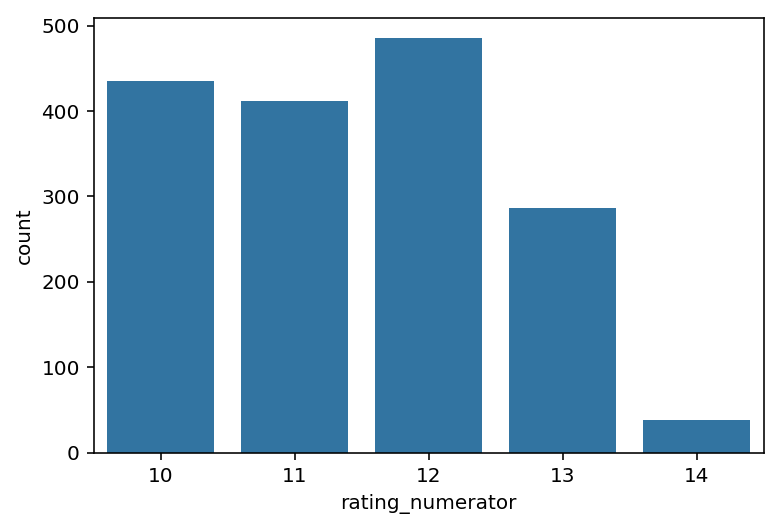

In [104]:
sns.countplot(data = archive, x = 'rating_numerator', color = base_color);

The three most common ratings are 10, 11 and 12. The highest possible rating, 14, is the rarest one.

#### Check the distribution of the ``favorite_count`` in the ``archive`` df.

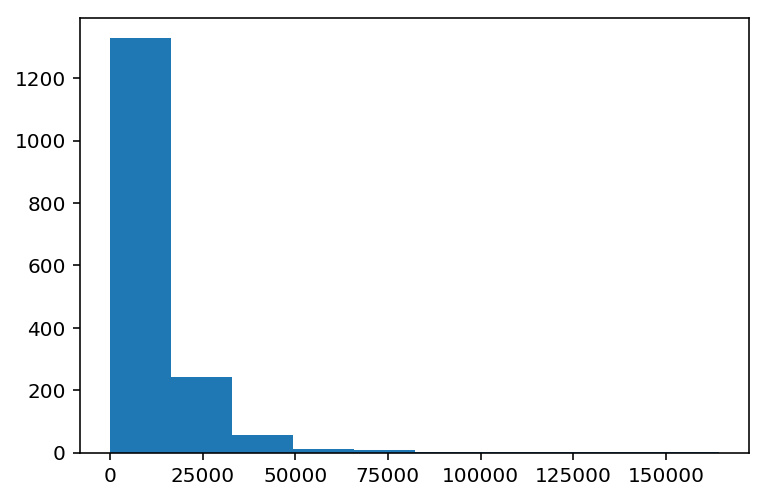

In [72]:
plt.hist(archive.favorite_count);

The default settings of matplotlib heavily skew the histogram to the right, this is likely because of few outliers to the right and large bin sizes. Therefore I chose to now only select the 95% quantile and reduce the bin size.

In [77]:
quantile95 = archive.favorite_count.quantile(.95)
quantile95

33302.75

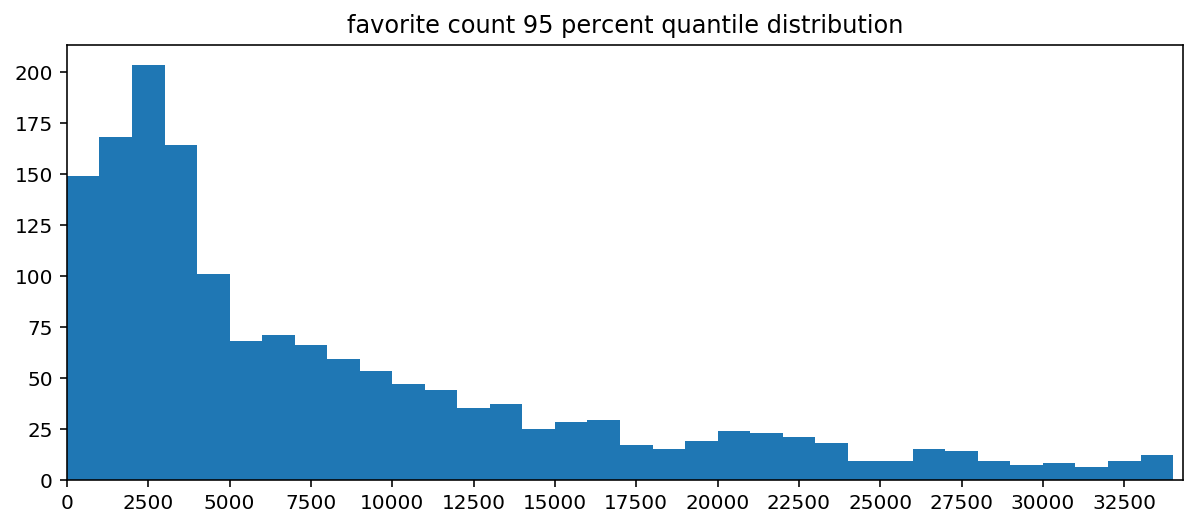

In [87]:
plt.figure(figsize = (10,4))
plt.hist(archive.favorite_count, bins=(np.arange(0, quantile95 + 1000, 1000)))
plt.xlim(0, quantile95 + 1000)
plt.xticks(np.arange(0, quantile95, 2500)) # set stepsize to 2500
plt.title('favorite count 95 percent quantile distribution');

Most tweets favorite count is in the range between 0 and 5000. Passed 5000 favorites, there's a major drop in occurrences.

#### Check the distribution of ``retweet count`` in the ``archive`` df.

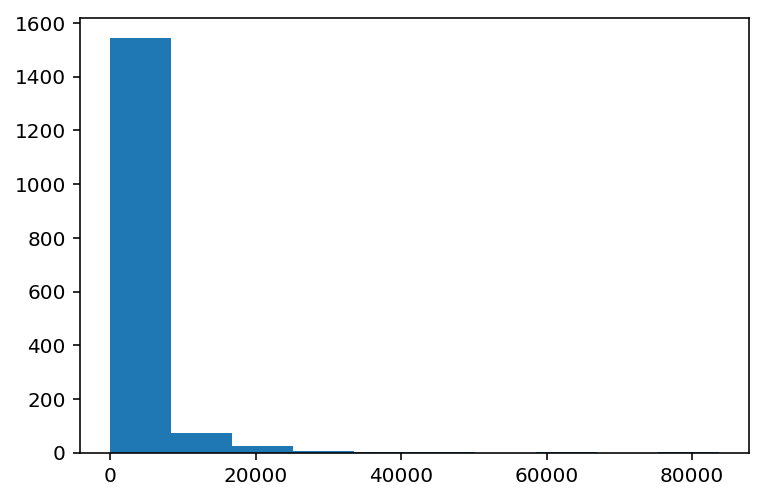

In [79]:
plt.hist(archive.retweet_count);

Same issue as before, hist is heavily skewed to the right.

This time, I want to adress the issue in a different way and apply a logarithmic scale (with base 10) to the x-axis. 

In [81]:
np.log10(archive.retweet_count.describe())

count    3.219060
mean     3.500478
std      3.715781
min      1.079181
25%      2.868497
50%      3.231215
75%      3.560236
max      4.922648
Name: retweet_count, dtype: float64

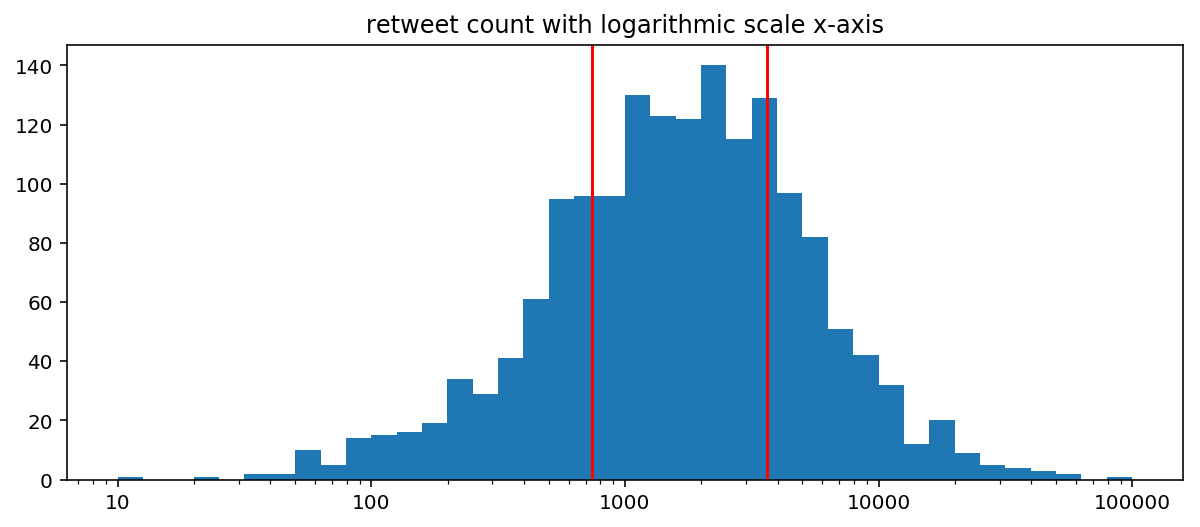

In [83]:
bins = 10 ** (np.arange(1, 5 + 0.1, 0.1)) # first value is min, second is max, third is step size

plt.figure(figsize = (10, 4))
plt.axvline(10 ** 2.868497, c = 'r') # 25 percentile
plt.axvline(10 ** 3.560236, c = 'r') # 75 percentile
plt.hist(archive.retweet_count, bins = bins)
plt.xscale('log')
ticks = [10, 100, 1000, 10000, 100000]
plt.xticks(ticks, ticks)
plt.title('retweet count with logarithmic scale x-axis');

Now the distribution of retweet counts becomes a lot more obvious. The two red lines define the area where 50% of all data point are located (roughly between 725 and 3630 retweets). 

#### Check most common dog type in tweets

In [84]:
top_predictions = predictions[predictions['confidence_order'] == 1] # only consider top predictions

n_points = top_predictions.shape[0] # total number of top predictions

order = top_predictions.prediction.value_counts().head(10).index # order of top 10 most predicted tog types

max_count = top_predictions.prediction.value_counts().max() 
max_prob = max_count / n_points # probability of most common dog type to define limit of x-axis

tick_probs = np.arange(0, max_prob, 0.01) # arange x-ticks in 0.01 steps

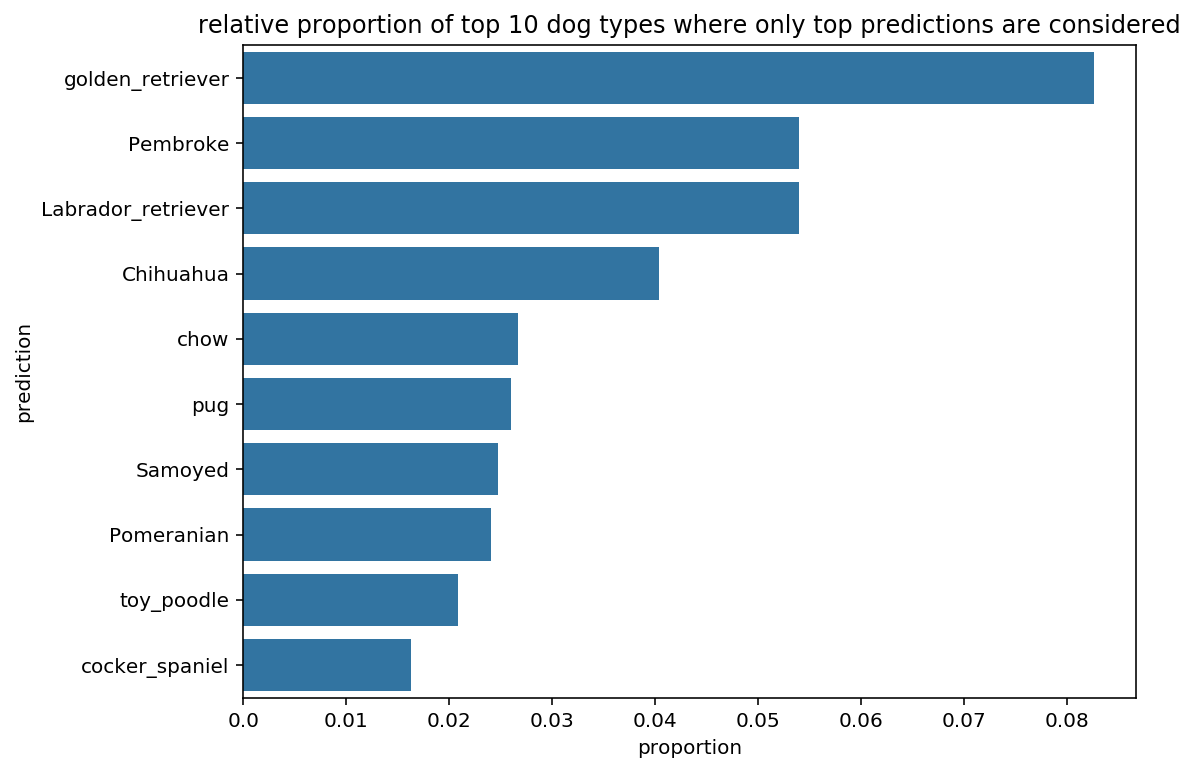

In [105]:
plt.figure(figsize = (8, 6))
sns.countplot(data = top_predictions, y = 'prediction', color = base_color, order=order)
plt.xticks(tick_probs * n_points, tick_probs)
plt.xlabel('proportion')
plt.title('relative proportion of top 10 dog types where only top predictions are considered');

With 8% of all tweets depicting a golden retriever in the image, it is by far the most fovoured dog of WeRateDogs. Top dog 5, the chow already has a popularity of less than 3%.

#### Which dog stage is the most common?

In [91]:
n = archive.dog_stage.count()
n

290

In [90]:
n_max = archive.dog_stage.value_counts().max()
p_max = n_max / n
ticks = np.arange(0, p_max, 0.10)
labels = ['{:.1f}'.format(v) for v in ticks]

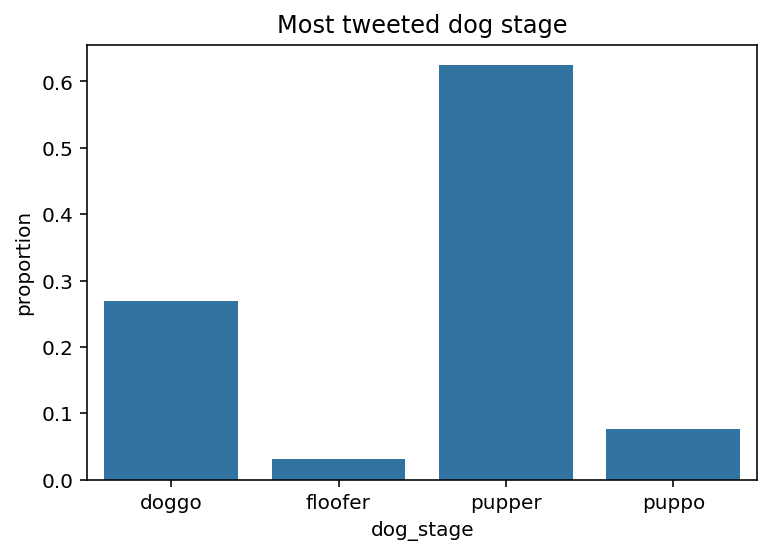

In [106]:
sns.countplot(data = archive, x='dog_stage', color=base_color)
plt.yticks(ticks * n, labels)
plt.ylabel('proportion')
plt.title('Most tweeted dog stage');

The dog stage was only retrieved for 290 of the total 1656 tweets. However, 60% of those 290 tweets depicted a pupper, followed by doggo with a little less than 30%. Floofers and puppos made up for less than 10% each.

### Bivariate Data Exploration

#### Are there differences in mean favorite & retweet count for different dog stages?

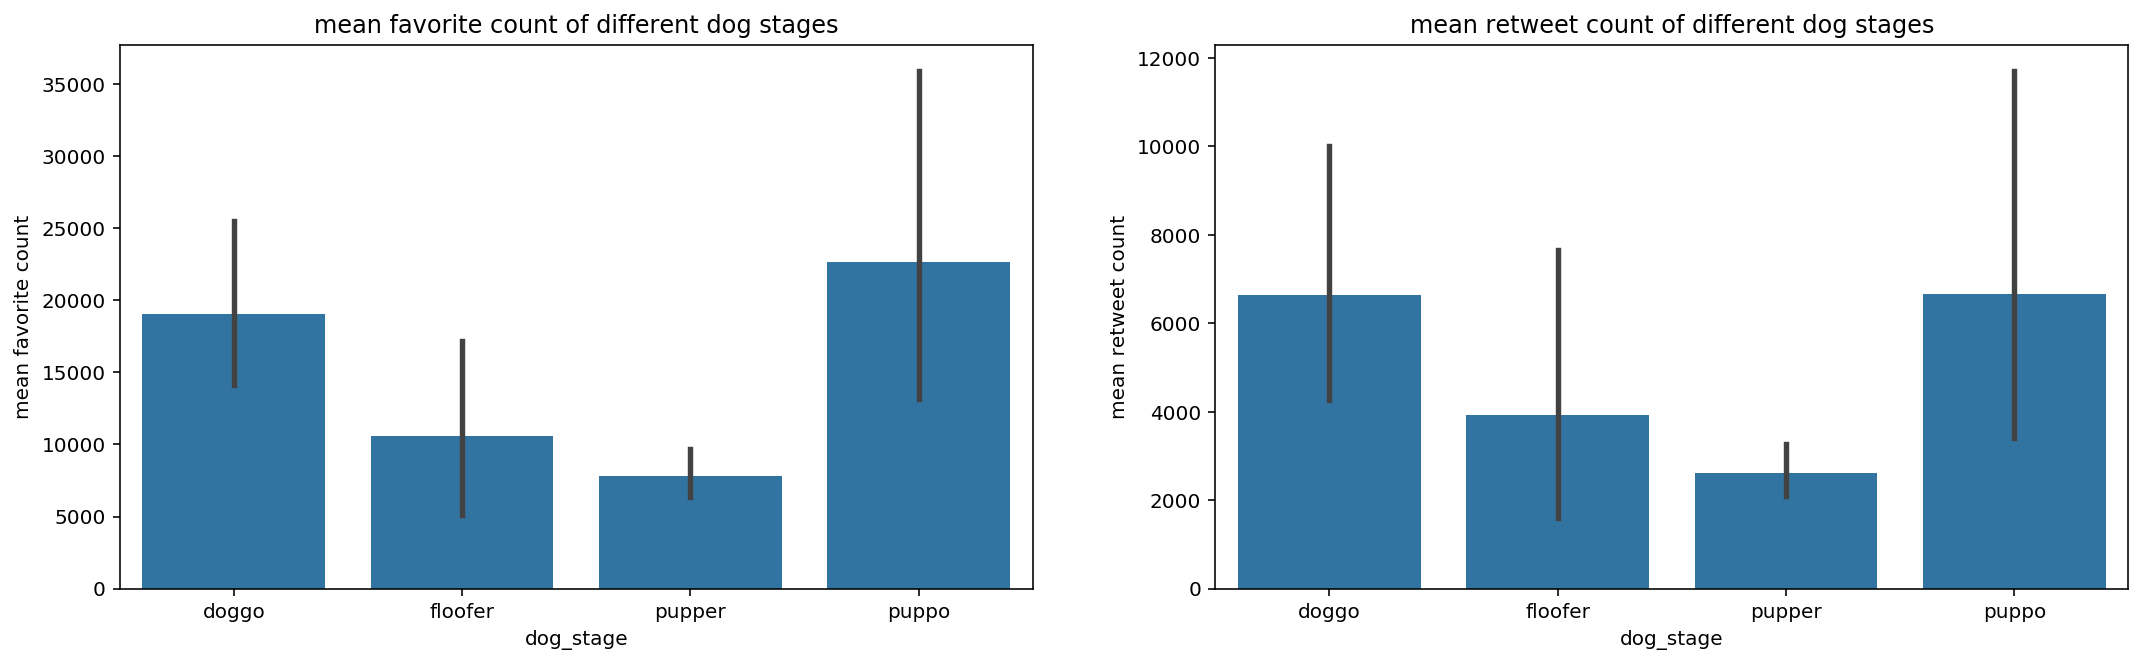

In [107]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
sns.barplot(data = archive, x = 'dog_stage', y = 'favorite_count',\
            color = base_color)
plt.ylabel('mean favorite count')
plt.title('mean favorite count of different dog stages');

plt.subplot(1, 2, 2)
sns.barplot(data = archive, x = 'dog_stage', y = 'retweet_count',\
            color = base_color)
plt.ylabel('mean retweet count')
plt.title('mean retweet count of different dog stages');

On average, tweets with dogs in stages doggo and puppo receive more favorites and retweets than floofers and puppers. The black line represents the mean uncertainty.

#### How do different variables evolve over time?

In [94]:
groupby_month = archive.groupby(pd.Grouper(key = 'timestamp', freq = 'M'))\
                [['retweet_count', 'favorite_count', 'followers_count']].mean().reset_index()

groupby_month.head(3)

,timestamp,retweet_count,favorite_count,followers_count
0,2015-11-30,581.925000,1464.387500,7.609713e+06
1,2015-12-31,1806.185345,4180.435345,7.609672e+06
2,2016-01-31,1588.007299,4043.963504,7.609619e+06


Resource: [Group by month](https://stackoverflow.com/questions/24082784/pandas-dataframe-groupby-datetime-month)

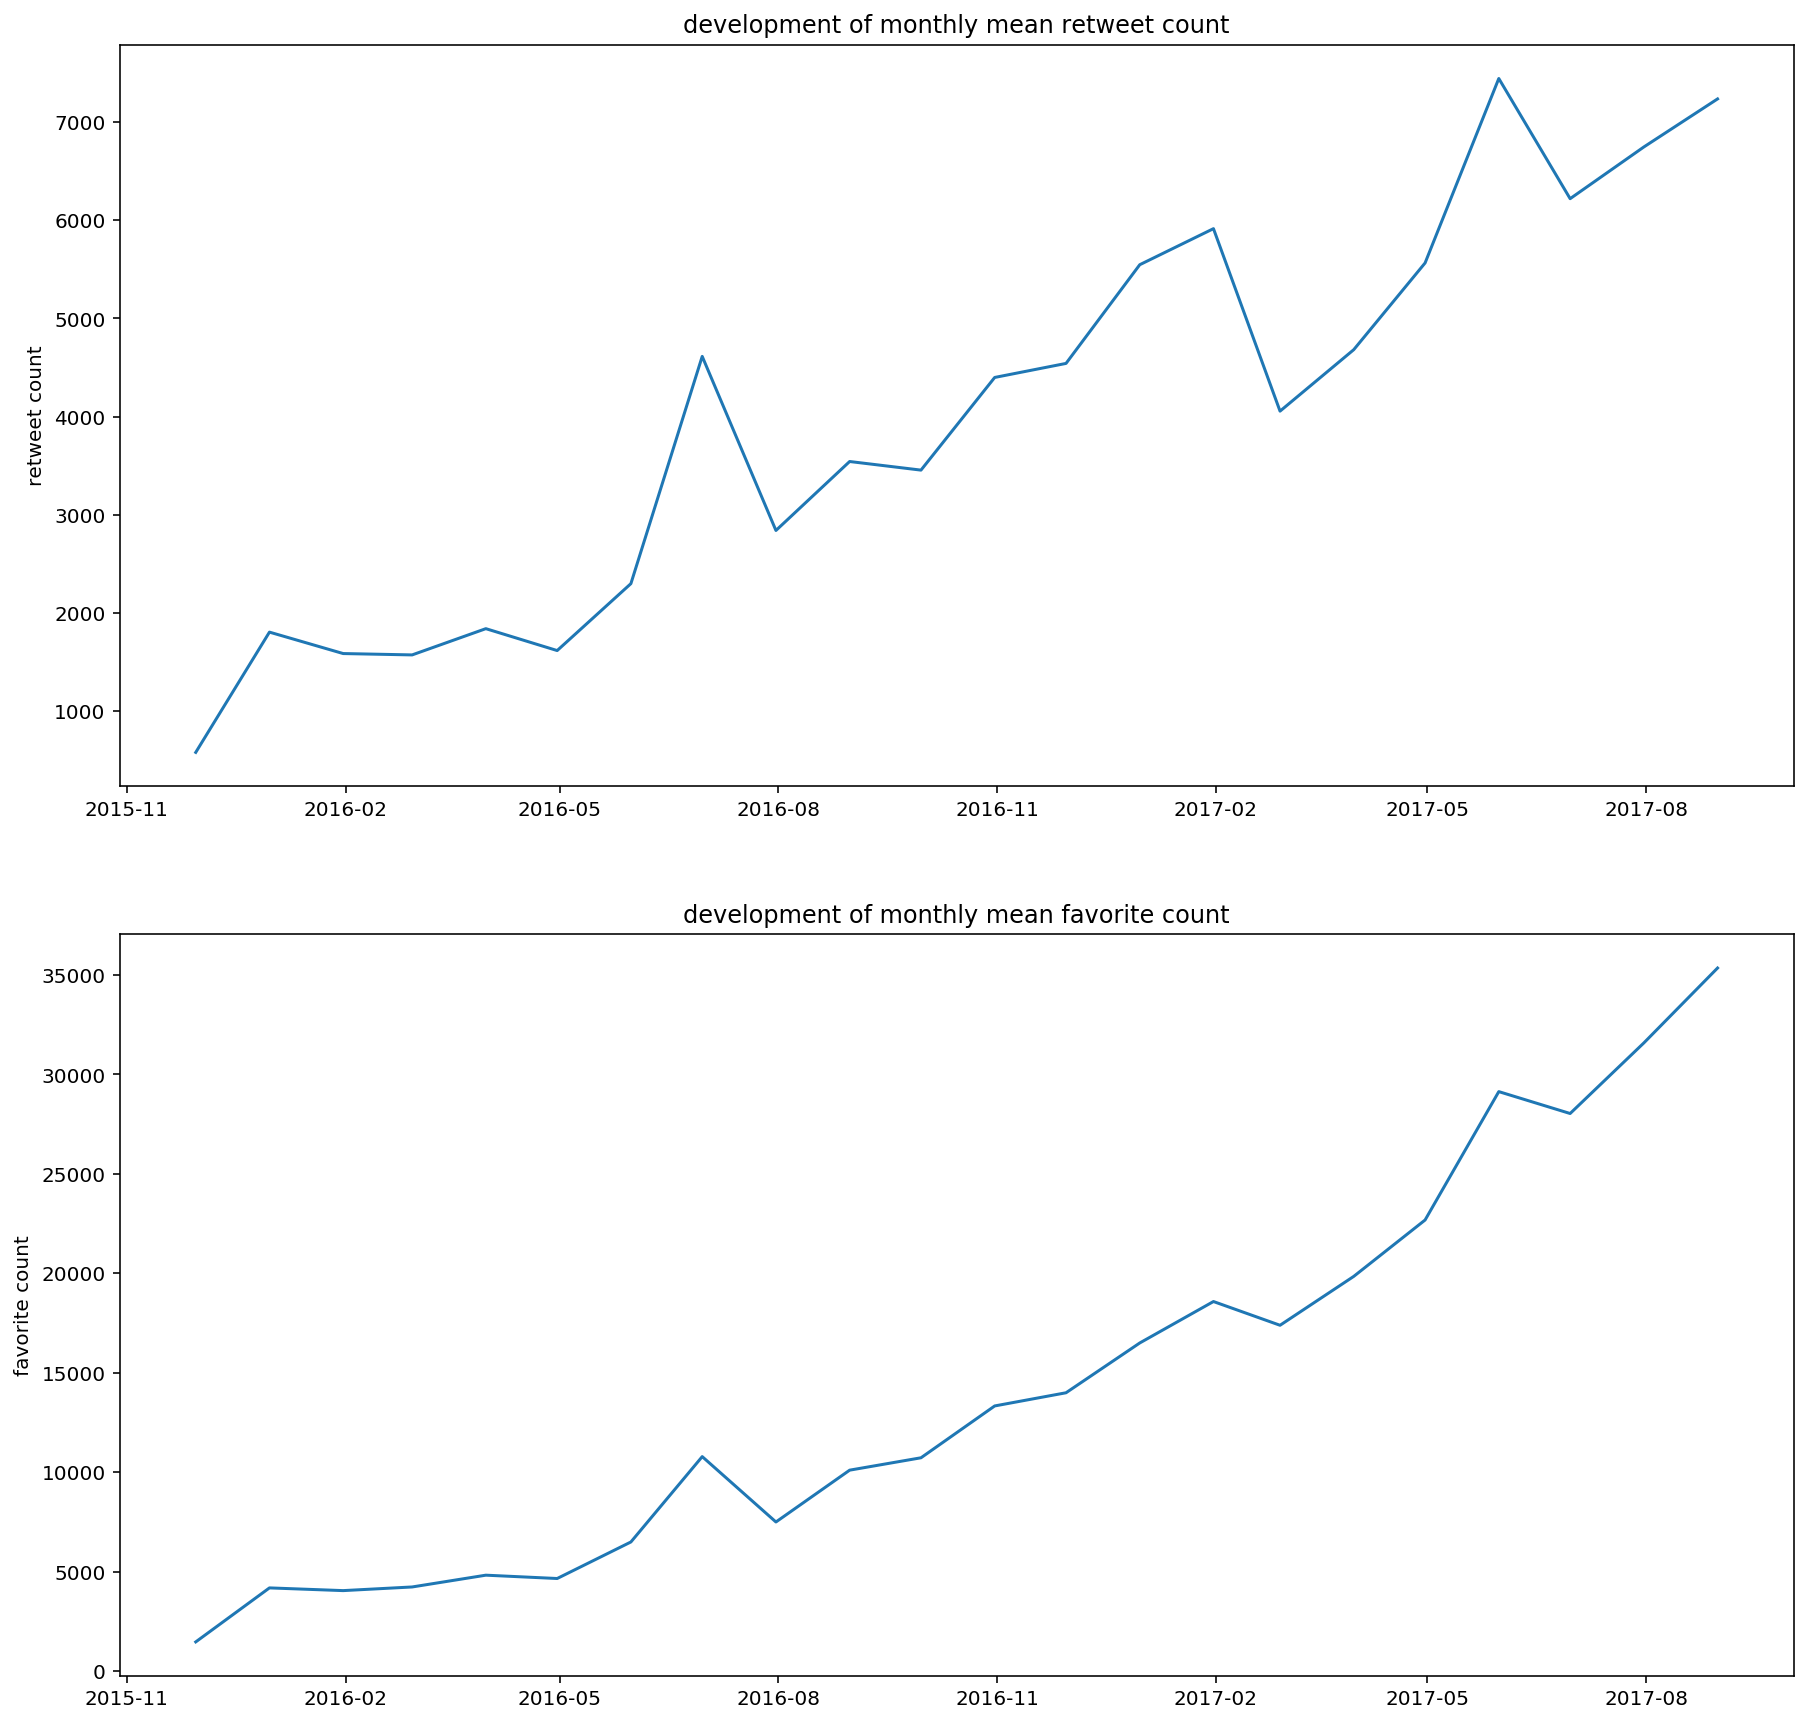

In [95]:
plt.figure(figsize = (15, 15))

plt.subplot(2, 1, 1)
plt.plot(groupby_month.timestamp, groupby_month.retweet_count)
plt.title('development of monthly mean retweet count')
plt.ylabel('retweet count');

plt.subplot(2, 1, 2)
plt.plot(groupby_month.timestamp, groupby_month.favorite_count)
plt.title('development of monthly mean favorite count')
plt.ylabel('favorite count');

Both retweet and favorite count experience a major increase over the course of 22 months. 

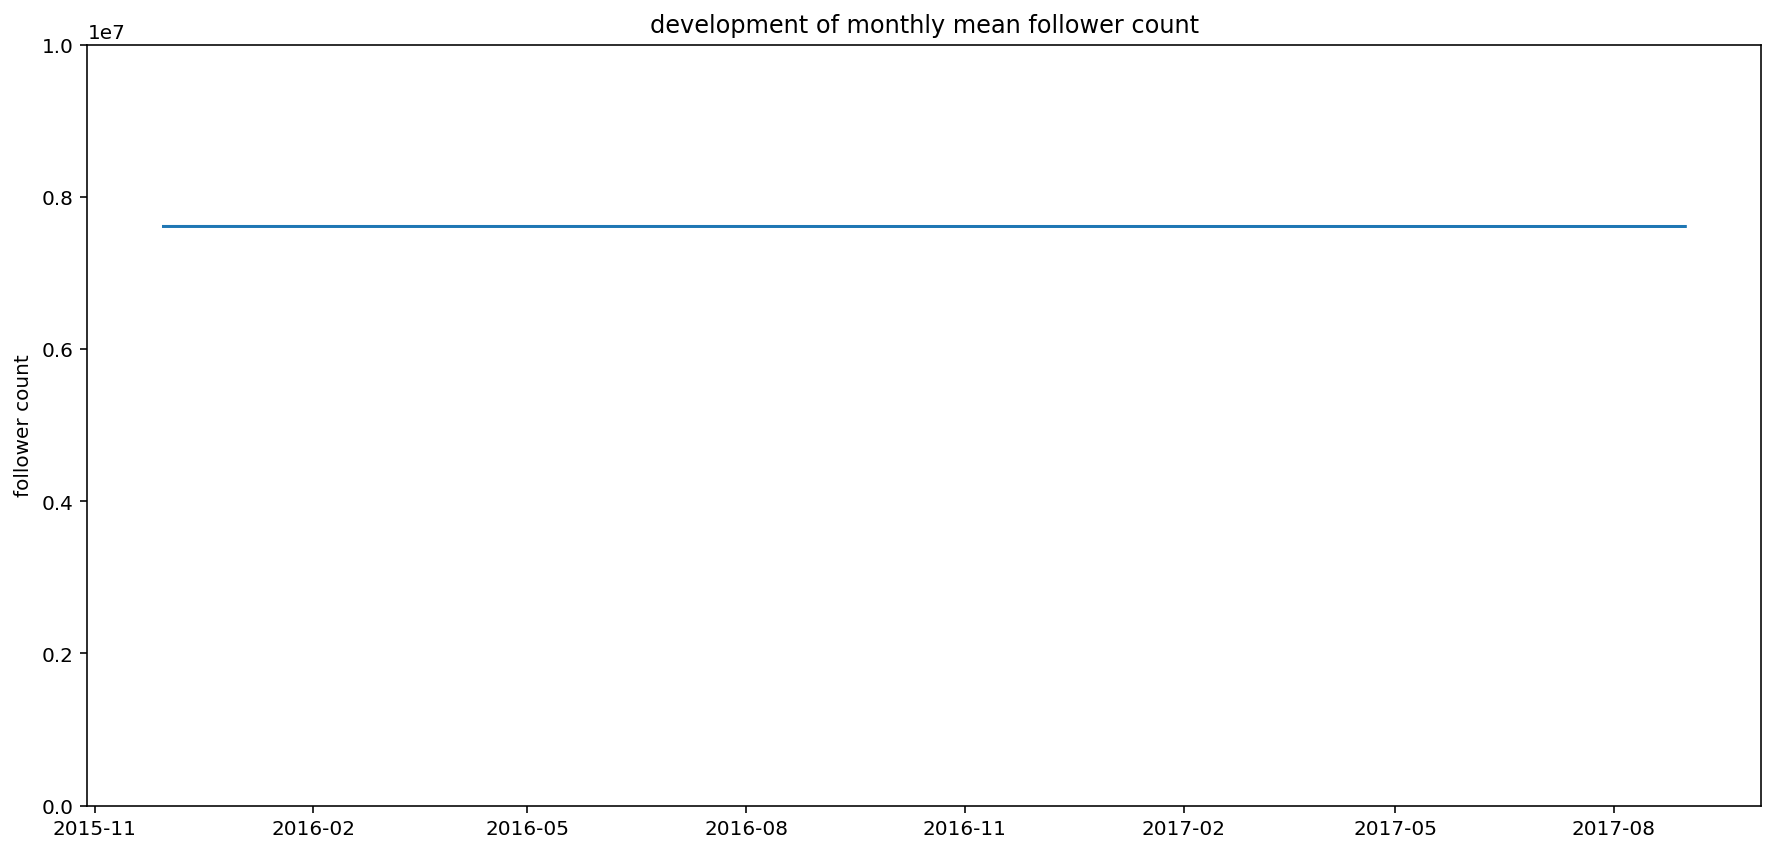

In [99]:
plt.figure(figsize = (15, 7))
plt.plot(groupby_month.timestamp, groupby_month.followers_count)
plt.ylim(0, 10000000)
plt.title('development of monthly mean follower count')
plt.ylabel('follower count');

The follower count on the other hand experienced only marginal changes over the analysed time period. This is not exactly what I expected as intuition makes me think that favorite and retweet count should be somewhat proportional to follower count.

### Multivariate Data Exploration

#### Does WeRateDogs tweet rating affect the retweet and favorite count?

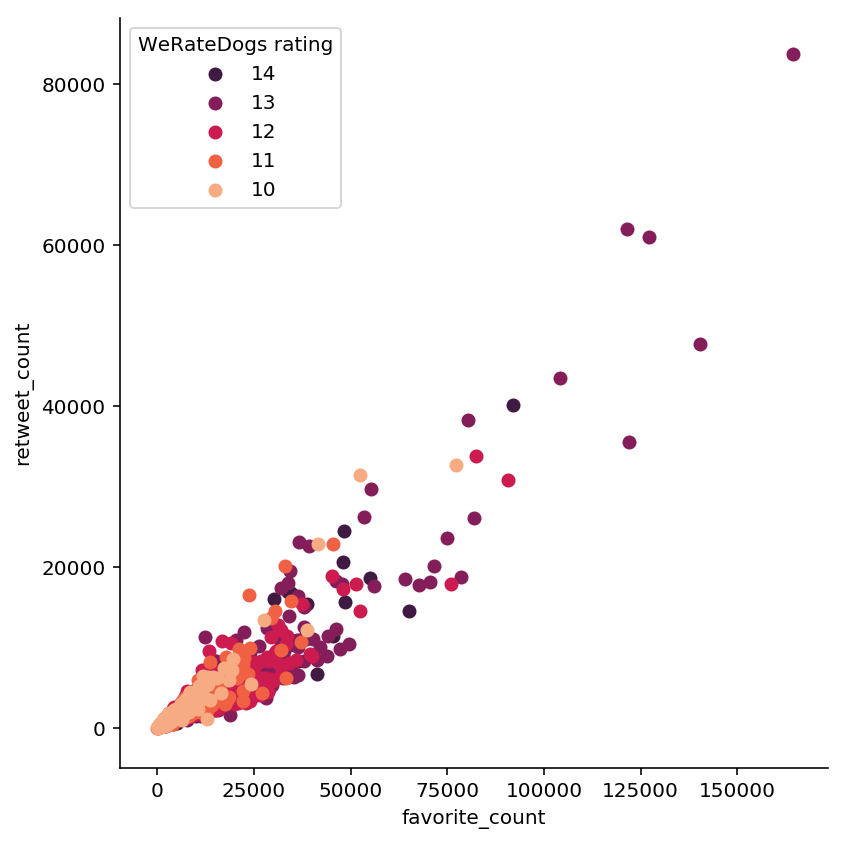

In [100]:
g = sns.FacetGrid(data = archive, hue = 'rating_numerator', size = 6,\
                  hue_order = [14, 13, 12, 11, 10], palette = 'rocket')
g.map(plt.scatter, 'favorite_count', 'retweet_count')
plt.legend(title = 'WeRateDogs rating');

Darker points (higher ratings) seem to be more located towards the top right. Therefore it does look like a high rating by WeRateDogs increases the probability of a tweet to go viral. Let's only plot the 95 percent quantile.

In [101]:
print(archive.favorite_count.quantile(0.95))
archive.retweet_count.quantile(0.95)

33302.75


10281.0

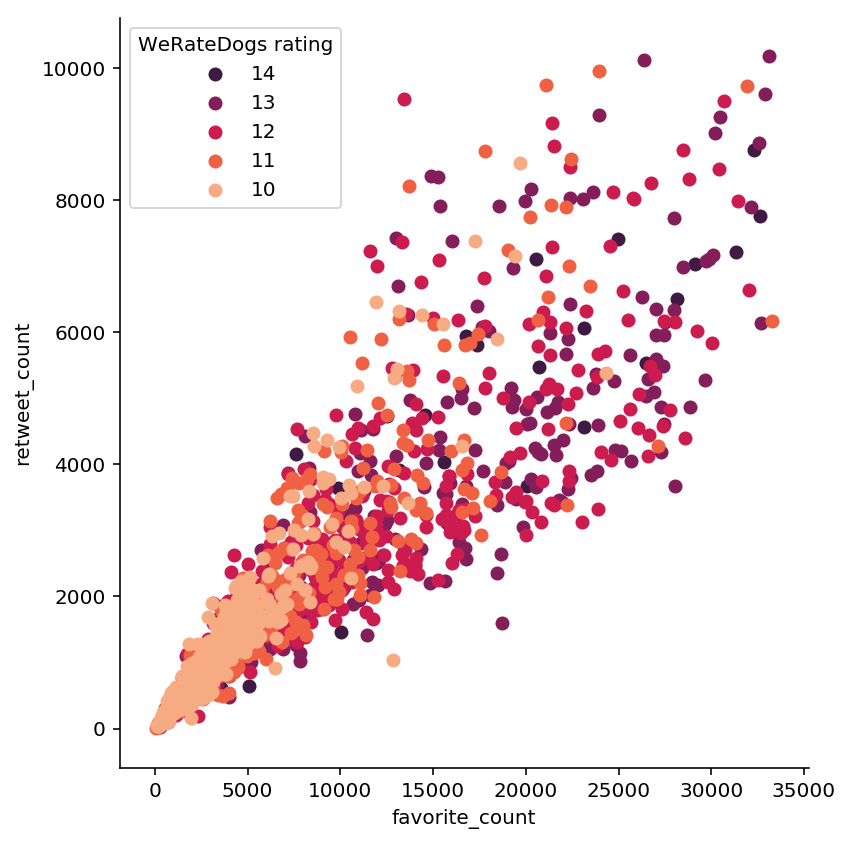

In [102]:
# only plot 95 percent quantile
data = archive.query('favorite_count < 33302.75 and retweet_count < 10281')

g = sns.FacetGrid(data = data, hue = 'rating_numerator', size = 6,\
                  hue_order = [14, 13, 12, 11, 10], palette = 'rocket')
g.map(plt.scatter, 'favorite_count', 'retweet_count')
plt.legend(title = 'WeRateDogs rating');